<a href="https://colab.research.google.com/github/rahmanziaur/Simu-Model-ICT/blob/main/Gaussian_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Gaussian distribution"
> "Implementing a gaussian distribution from scratch (almost)"
- toc: false
- branch: master
- badges: true
- comments: true
- categories: [Python, statistics]
- image: images/
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2
- use_math: true

Following notebook is inspired from one of the projects I was pursuing during the final year of my PhD. In the project I didn't know the actual distribution but had only a sample, and I needed to know from which distribution does the sample comes from. There are some very interesting statistical tests which one could employ to figure this out.

The purpose of this notebook is to introduce the Gaussian distribution (also known as normal distribution)- the distribution from which my sample came from.

Normal distribution is quite ubiquitous in life. Few examples include height of people, newborns’ birth weight, the sum of two dice, etc. There are many python libraries one can use to generate a normal distribution. However, in this notebook, we will implement the formula by ourselves.  

The probability density function of a normal distribution is given as

$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(x - \mu)^2}{2\sigma^2})$

where, the parameter $\mu$ is the mean and $\sigma$ is its standard deviation. The term $\sqrt{2\pi\sigma^2}$ is known as the [normalizing constant](https://en.wikipedia.org/wiki/Normalizing_constant) and is mainly used to reduce the probability function to a probability density function with total probability of one.

Let's now write a function which returns a gaussian distribution given the mean and the standard deviation. We will write two functions, *pdf_gaussian* and *pf_gaussian* where former is a probability density function (pdf) and later is just a gaussian probability function.  

# pdf_gaussian

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)


x, dx = np.linspace(-1 ,3,300, retstep = True)

def pdf_gaussian(sigma, mean, x):
  Z = np.sqrt(2.0*np.pi*sigma**2) # Normalization constant
  pdf_z = np.exp(-((x - mean)**2/(2.0*sigma**2)))/Z #
  return pdf_z

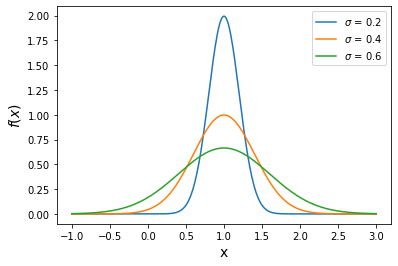

In [ ]:
pdf_1 = pdf_gaussian(0.2, 1.0, x)
pdf_2 = pdf_gaussian(0.4, 1.0, x)
pdf_3 = pdf_gaussian(0.6, 1.0, x)
plt.plot(x, pdf_1, label = '$\sigma$ = 0.2')
plt.plot(x, pdf_2,label = '$\sigma$ = 0.4')
plt.plot(x, pdf_3,label = '$\sigma$ = 0.6')
plt.xlabel("x",fontsize = 14)
plt.ylabel("$f(x)$",fontsize = 14)
plt.legend()


In the above plot, we created three gaussian distributions with identical mean of 1.0 and three different standard deviation. One can see that as we increase the standard deviation, distributions start to spread out and their height also reduces. Now, as they are probability density functions, area under the curve should be `one`. Let's integrate over the function to calculate area under the curve. We will use [Simpson's rule](https://en.wikipedia.org/wiki/Simpson%27s_rule) for integration.

In [ ]:
from scipy.integrate import trapz, simps


auc_1 = simps(pdf_1,x)
auc_2 = simps(pdf_2,x)
auc_3 = simps(pdf_3,x)
print('\033[92m' + "Area under curve for 1st distribution = ", auc_1)
print('\033[91m' + "Area under curve for 2ns distribution = ", auc_2)
print('\033[94m' + "Area under curve for 3rd distribution = ", auc_3)

Area under curve for 1st distribution =  1.0000000000000002
Area under curve for 2ns distribution =  0.9999994268145564
Area under curve for 3rd distribution =  0.9991418940563864


We can see that the area under the curve for all three distributions is almost 1.0.

Let's now write a function to get a gaussian probability function.

# pf_gaussian

In [ ]:
def pf_gaussian(sigma, mean, x):
  pf = np.exp(-((x - mean)**2/(2.0*sigma**2))) # Gaussian distribution
  return pf

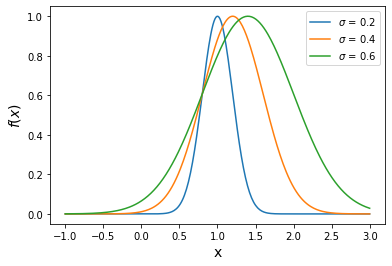

In [ ]:
pf_1 = pf_gaussian(0.2, 1.0, x)
pf_2 = pf_gaussian(0.4, 1.2, x)
pf_3 = pf_gaussian(0.6, 1.4, x)
plt.plot(x, pf_1, label = '$\sigma$ = 0.2')
plt.plot(x, pf_2,label = '$\sigma$ = 0.4')
plt.plot(x, pf_3,label = '$\sigma$ = 0.6')
plt.xlabel("x",fontsize = 14)
plt.ylabel("$f(x)$",fontsize = 14)
plt.legend()

We can see that all three curves look like a gaussian distribution but unlike earlier plots, they all have similar height even though they have different standard deviations. The reason being that we used a gaussian probability function and not a probability density function where we divide by the normalization constant. Therefore, area under the curve will not result in one.  

In [ ]:
auc_1 = simps(pf_1,x)
auc_2 = simps(pf_2,x)
auc_3 = simps(pf_3,x)
print('\033[92m' + "Area under curve for 1st distribution = ", auc_1)
print('\033[91m' + "Area under curve for 2nd distribution = ", auc_2)
print('\033[94m' + "Area under curve for 3rd distribution = ", auc_3)

Area under curve for 1st distribution =  0.5013256549262002
Area under curve for 2nd distribution =  1.0026478846416773
Area under curve for 3rd distribution =  1.4981685783423222


If you would like to read more on normal distributions, please follow [this](https://ekamperi.github.io/mathematics/2021/01/29/why-is-normal-distribution-so-ubiquitous.html) excellent blog post. Thanks for reading!